In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=9
paper='2008.08998'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's break down this Hartree-Fock Hamiltonian for a triangular lattice with $\sqrt{3} \times \sqrt{3}$ superlattice structure. I'll first analyze what dimensions and basis order we need.

## Question 1: Dimension and Basis Order

The Hamiltonian involves operators of the form $c_{\bm{q},s}^\dagger(\bm{p})$ and $c_{\bm{q},s}(\bm{p})$, where:
- $\bm{p}$ is the crystal momentum in the folded Brillouin zone
- $\bm{q}$ is a reciprocal lattice vector, which takes three possible values: $\Gamma$, $K$, and $K'$
- $s$ represents spin

So the flavors are:
1. $s$ (spin): There are two possibilities (up and down), so $|s| = 2$
2. $\bm{q}$ (reciprocal lattice vector): Three possibilities ($\Gamma$, $K$, $K'$), so $|\bm{q}| = 3$

So the tuple of flavors would be D = (2, 3), with the dimensions representing (spin, reciprocal_lattice_vector).

For the basis order:
0: spin. Order: up, down
1: reciprocal_lattice_vector. Order: $\Gamma$, $K$, $K'$

##

In [7]:
print(generated_code['thinking'])

Let's break down this Hartree-Fock Hamiltonian for a triangular lattice with $\sqrt{3} \times \sqrt{3}$ superlattice structure. I'll first analyze what dimensions and basis order we need.

## Question 1: Dimension and Basis Order

The Hamiltonian involves operators of the form $c_{\bm{q},s}^\dagger(\bm{p})$ and $c_{\bm{q},s}(\bm{p})$, where:
- $\bm{p}$ is the crystal momentum in the folded Brillouin zone
- $\bm{q}$ is a reciprocal lattice vector, which takes three possible values: $\Gamma$, $K$, and $K'$
- $s$ represents spin

So the flavors are:
1. $s$ (spin): There are two possibilities (up and down), so $|s| = 2$
2. $\bm{q}$ (reciprocal lattice vector): Three possibilities ($\Gamma$, $K$, $K'$), so $|\bm{q}| = 3$

So the tuple of flavors would be D = (2, 3), with the dimensions representing (spin, reciprocal_lattice_vector).

For the basis order:
0: spin. Order: up, down
1: reciprocal_lattice_vector. Order: $\Gamma$, $K$, $K'$

## Question 2: Identifying Interacting Terms

The Hamil

In [8]:
print(generated_code['text'])

I'll analyze this Hartree-Fock Hamiltonian on a triangular lattice and create the appropriate Python class.

## 1) Dimension and Basis Order

Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up, down
1: reciprocal_lattice_vector. Order: Γ, K, K'

The Hamiltonian has two flavors: spin (up, down) and the reciprocal lattice vector (Γ, K, K'). The third dimension is the crystal momentum p in the folded Brillouin zone.

## 2) EXP-VAL DEPENDENT TERMS

EXP-VAL DEPENDENT TERMS:
- `\langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\delta,s}(\bm{p}_\alpha) \rangle`: Mean density of spin s electrons between q_alpha and q_delta
- `\langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\gamma,s'}(\bm{p}_\alpha) \rangle`: Exchange correlation between different spins and q-vectors

TERMS:
- `\sum_{s}\sum_{\bm{p},\bm{q}}\sum_{R_\bm{n}} t_{s}(\bm{n}) e^{-i (\bm{p}+\bm{q}) \cdot R_\bm{n}} c_{\bm{p}+\bm{q},s}^\dagger c_{\bm{p},s}` -> H[s, q1, s, q2, k], NI (tight-binding terms)

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any, Dict, Tuple, List
from HF import *

class HartreeFockHamiltonian:
    """Hartree-Fock Hamiltonian for a triangular lattice with a sqrt(3) × sqrt(3) superlattice.
    
    This class implements the Hamiltonian for a system with spin and reciprocal lattice vector
    degrees of freedom, with both tight-binding terms and Coulomb interactions treated
    at the Hartree-Fock level.
    
    Args:
        N_shell (int): Number of shells in k-space.
        parameters (dict): Model parameters including hopping and interaction strengths.
        filling_factor (float, optional): Filling factor of the system. Defaults to 0.5.
    """
    def __init__(self, N_shell, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2, 3)  # (spin, reciprocal_lattice_vector)
        self.basis_order = {'0': 'spin', '1': 'reciprocal_lattice_vector'}
        # 0: spin up, spin down
        # 1: Gamma, K, K'
   

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2008_08998_9.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

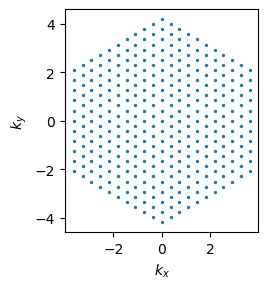

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

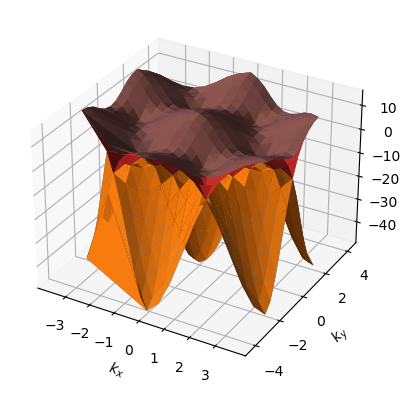

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

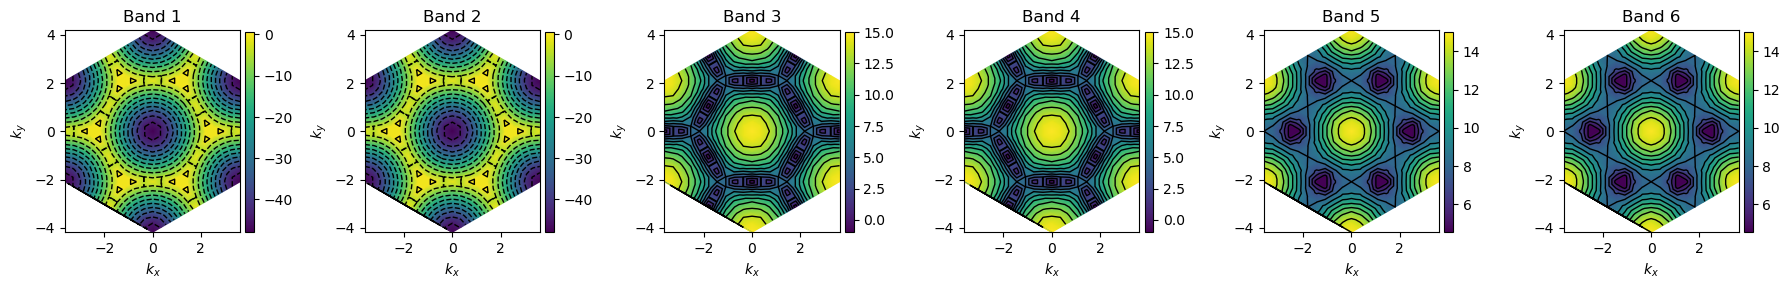

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e5},filling_factor=1/2)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 1


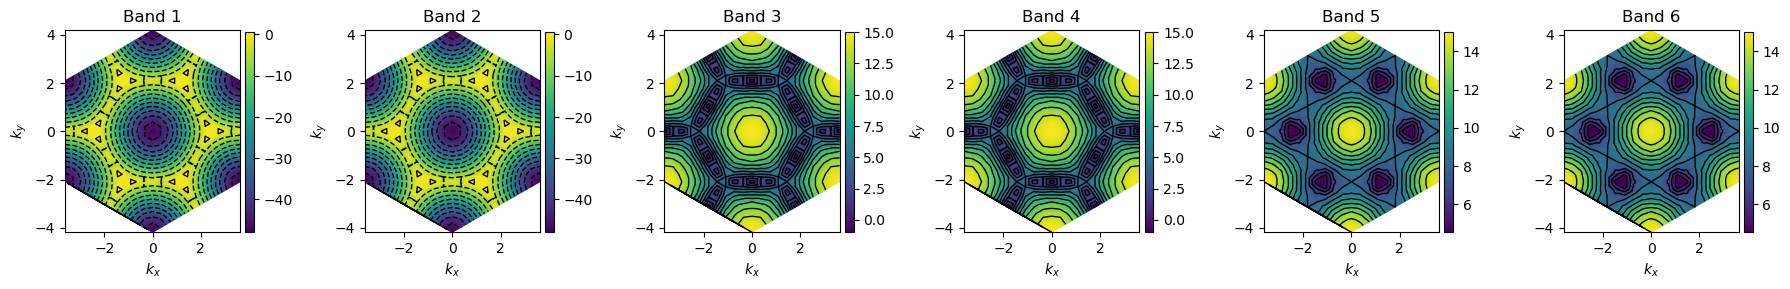

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e-2},filling_factor=1/2)


In [28]:
h_nonint=ham_int.generate_non_interacting()
for q in range(3):
    h_nonint[0,q,0,q,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 1


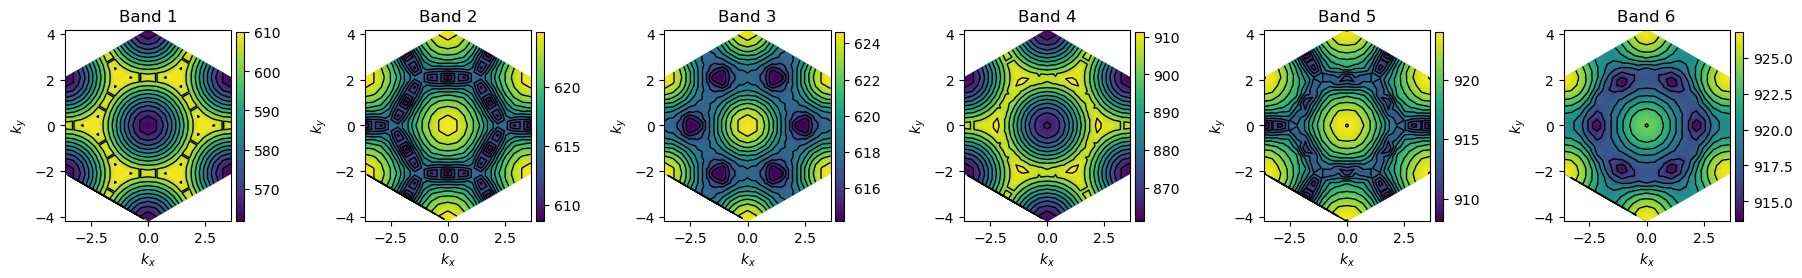

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is -10.47
U/T is 62.05
mean_U is 126.76


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

I need to evaluate whether the image shows the momentum space mesh in the first Brillouin zone with the correct point group symmetry for the problem at hand.

Let's break down what we're looking at:

1. The image shows a hexagonal pattern of points in momentum space, with k_x on the horizontal axis and k_y on the vertical axis.
2. The points are arranged in a regular pattern within what appears to be the first Brillouin zone of a triangular lattice.

From the problem description:
- We're working with a triangular lattice
- The problem mentions a "folded Brillouin zone" corresponding to a √3 × √3 superlattice in real space
- The folded BZ has reciprocal lattice vector length of 1/√3 of the original reciprocal lattice vector length, and is rotated by 90 degrees

Now I need to check if the image is consistent with these specifications:

Point group symmetry of a triangular lattice:
- The Brillouin zone of a triangular lattice is hexagon

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and evaluate it according to the rubric.

The image shows 6 false color plots labeled Band 1 through Band 6, each showing energy contours in the first Brillouin zone. I need to analyze these band structure plots with attention to symmetry to determine if they correctly represent the non-interacting band structure for the given Hamiltonian on a triangular lattice.

Let's go through the rubric points:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

I can see that the Brillouin zone in each plot has a hexagonal shape. This is indeed the expected shape for a triangular lattice in reciprocal space. The first Brillouin zone of a triangular lattice is hexagonal. So this criterion appears to be satisfied.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yello

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

I'm given an image showing band structure plots for a system on a triangular lattice, calculated using the Hartree-Fock method. I need to analyze this band structure according to the rubric to determine if the calculation is correct.

Let's follow the rubric step by step:

1. Identify the shape of the Brillouin zone boundary:
   - In the image, I can see 6 hexagonal plots labeled "Band 1" through "Band 6".
   - The Brillouin zone boundary for each band is a hexagon, which is correct for a triangular lattice. The first Brillouin zone of a triangular lattice should indeed be a regular hexagon.

2. Examine the symmetry of the energy distribution:
   2.1 Highest energy regions (yellow):
      - Bands 1-2: The yellow regions are at the corners and along the edges of the hexagon
      - Bands 3-6: The yellow regions are in the center and along radial patterns
   
   2.2 Pattern of energy variation:
      - Bands 1-2: Show a hexagonal symme

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='U/epsilon_r=1000/1e-2=100000',nu=1/2)
    )


#################### THINKING ####################

I need to analyze these band structure plots according to the rubric provided. Let me go through each point systematically.

1. First, identify the shape of the Brillouin zone boundary:
Looking at the image, I can see that the plots are showing a hexagonal Brillouin zone, which is indeed the expected shape for a triangular lattice in reciprocal space. This is correct.

2. Examining the symmetry of the energy distribution shown by the false color plot:

2.1 Highest energy regions (yellow):
In each band, the yellow (highest energy) regions are visible. They appear in different patterns across the different bands:
- Band 1: Yellow regions at the corners and midpoints of the edges of the hexagon
- Band 2: Yellow regions primarily at the center and corners
- Band 3: Similar to Band 2 with some differences in intensity
- Band 4: Yellow regions mainly at the edges
- Band 5: Yellow regions at the center and in a ring-like pattern
- Band 6: Y

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '9' saved to final_answer.yaml
